# Importing Libraries 

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [185]:
data= pd.read_csv('data.csv')

# EDA 

In [186]:
# This is how the data looks like
data.head()

,time,T_in,T_amb,T_out,Q
0,0,34.1,39.6,32.5,5020.8
1,10,33.5,39.6,31.3,6903.6
2,20,34.2,39.6,30.6,11296.8
3,30,36.2,39.6,30.1,19141.8
4,40,37.0,39.8,29.6,23221.2


In [187]:
# Dropping Column of Q 
data= data.drop(['Q'], axis=1)

In [188]:
# Check the data's information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8484 entries, 0 to 8483
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    8484 non-null   int64  
 1   T_in    8484 non-null   float64
 2   T_amb   8484 non-null   float64
 3   T_out   8484 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 265.2 KB


In [189]:
# Our input features are [time, T_in, T_amb]
# Our output feature is T_out
# T_out information
data['T_out'].describe()

count    8484.000000
mean       30.475872
std         0.696461
min        27.700000
25%        30.100000
50%        30.600000
75%        31.000000
max        33.400000
Name: T_out, dtype: float64

<Figure size 648x576 with 0 Axes>

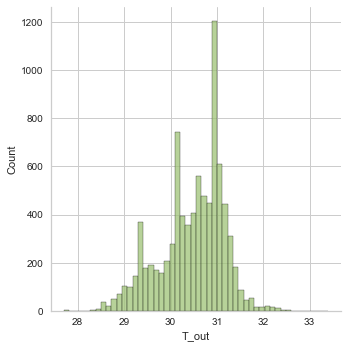

In [190]:
#Plotting the distribution of T_out features 
plt.figure(figsize=(9,8))
sns.displot(data['T_out'], color='g', bins=50);

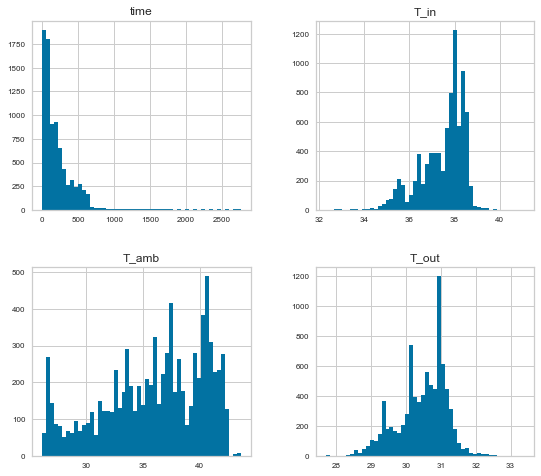

In [191]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()
df_num.hist(figsize=(9, 8), bins=50, xlabelsize=8, ylabelsize=8);

In [192]:
#Find the Correlation between data 
#Correlation is a statistical measure that expresses the extent to which two variables are linearly related
data.corr()

,time,T_in,T_amb,T_out
time,1.000000,0.367778,0.320203,0.287119
T_in,0.367778,1.000000,0.527523,0.583004
T_amb,0.320203,0.527523,1.000000,0.448665
T_out,0.287119,0.583004,0.448665,1.000000


In [193]:
#Correlation of T_out with the dependent features
data.corr()['T_out']

time     0.287119
T_in     0.583004
T_amb    0.448665
T_out    1.000000
Name: T_out, dtype: float64

In [194]:
data['time']= data['time']/10;
data['time'].describe()

count    8484.000000
mean       24.172678
std        32.785163
min         0.000000
25%         6.000000
50%        14.000000
75%        29.000000
max       276.000000
Name: time, dtype: float64

In [15]:
#Finding p-values
from scipy import stats
r1,p1 = stats.pearsonr(data.time, data.T_out)
r2,p2= stats.pearsonr(data.T_in, data.T_out)
r3, p3= stats.pearsonr(data.T_amb, data.T_out)
print(round(p1,15))
print(round(p2,15))
print(round(p3,15))

0.0
0.0
0.0


In [16]:
#from the correlation values and p-values we find that all the features are important

<AxesSubplot:>

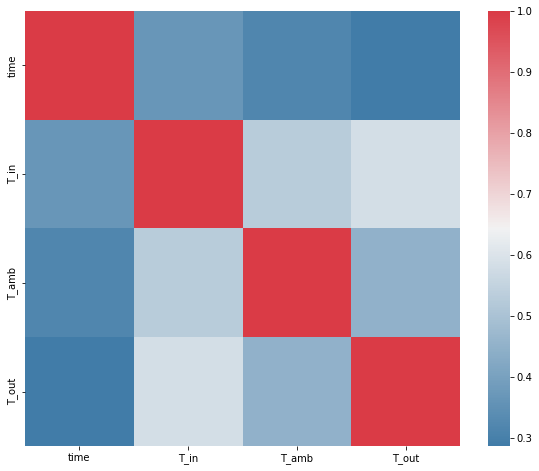

In [18]:
#HeatMap of correlation values
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

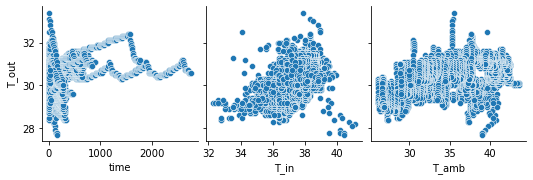

In [19]:
#Using seaborn library to plot the data 
sns.pairplot(
    data,
    x_vars=["time", "T_in", "T_amb"],
    y_vars=["T_out"],
)

# DATA FOR MODEL

In [21]:
X,y=  data[['time', 'T_in', 'T_amb']], data[['T_out']]

In [22]:
#Standardising the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y= sc_y.fit_transform(y)

In [23]:
#split the data into training and testing data : 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Model 1: Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#fit the training data into the data
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# finding the predicted y for the testing data 
y_test_pred = model.predict(X_test)

In [30]:
#Evaluating model's performance 
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
import math
print('Root Mean squared error (RMSE): %.2f'
      % math.sqrt(mean_squared_error(y_test, y_test_pred) ) )
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_test_pred))

Coefficients: [[0.0545253  0.46488366 0.18669734]]
Intercept: [0.00592974]
Root Mean squared error (MSE): 0.78
Coefficient of determination (R^2): 0.38


In [44]:
y_test.shape, y_test_pred.shape

((2546, 1), (2546, 1))

# Model 2: Polynomial Regression

In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [98]:
degree=5
transformer = PolynomialFeatures(degree, include_bias=False)

In [99]:
transformer.fit(X_train)

PolynomialFeatures(degree=5, include_bias=False)

In [100]:
 x_ = PolynomialFeatures(degree, include_bias=False).fit_transform(X_train)
 x_test=PolynomialFeatures(degree, include_bias=False).fit_transform(X_test)
 model2 = LinearRegression().fit(x_, y_train)
y_test_pred= model2.predict(x_test)

In [101]:
print('Coefficients:', model2.coef_)
print('Intercept:', model2.intercept_)
import math
print('Root Mean squared error (RMSE): %.2f'
      % math.sqrt(mean_squared_error(y_test, y_test_pred) ) )
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_test_pred))

Coefficients: [[ 4.67118540e-01  4.86215686e-01  1.33895564e-01  1.47553735e+00
  -6.90531699e-01  1.10161349e+00  1.85788599e-01  7.20950404e-01
  -6.80228138e-01 -5.90067814e-01 -6.94109637e-01 -2.15461953e-01
   5.12968858e-01 -1.16759197e-01 -1.22637168e+00 -5.60154587e-02
   5.72283172e-03  1.35640694e-01  1.96084374e-01  4.87702674e-02
   5.87320615e-01  2.19557789e-01 -9.72897580e-01 -1.29486467e+00
  -4.26890624e-01  2.82733143e-01  2.97166990e-01  4.76031320e-01
  -1.10801635e-01 -8.89171354e-02 -9.53335167e-02  9.42288435e-02
  -3.36934687e-01  1.74297880e-01  7.80403435e-04 -4.93631134e-02
  -2.84477598e-02 -1.46278649e-02  2.45296644e-02  4.67100497e-02
   2.99393647e-01  3.94463700e-01  4.42433157e-01  9.14686422e-02
  -2.22184851e-01  4.91914810e-02  1.84729532e-01 -5.77468088e-01
   3.07135240e-01  1.51109256e-02 -1.82684384e-02 -4.95558223e-02
   7.67579750e-02 -9.28142901e-02 -2.95952086e-03]]
Intercept: [-0.01582727]
Root Mean squared error (MSE): 0.56
Coefficient of 

# Model 3: Random Forest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
 reg= RandomForestRegressor(max_depth=7, random_state=0, n_estimators=100)
 reg.fit(X_train, y_train)

C:\Users\Yatin Mittal\AppData\Local\Temp\ipykernel_27188\3898506524.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


RandomForestRegressor(max_depth=7, random_state=0)

In [123]:
y_test_pred = reg.predict(X_test)

In [124]:
import math
print('Root Mean squared error (RMSE): %.2f'
      % math.sqrt(mean_squared_error(y_test, y_test_pred) ) )
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_test_pred))

Root Mean squared error (MSE): 0.48
Coefficient of determination (R^2): 0.77


# Model 4: XGBoost

In [126]:
!pip install xgboost

In [127]:
import xgboost as xg

In [144]:
xgb_r = xg.XGBRegressor(n_estimators=100, max_depth=6)

In [145]:
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [146]:
y_test_pred = xgb_r.predict(X_test)

In [176]:
!pip install yellowbrick

In [159]:
from yellowbrick.regressor import prediction_error

Root Mean squared error (MSE): 0.36
Coefficient of determination (R^2): 0.87

Prediction Error Plot


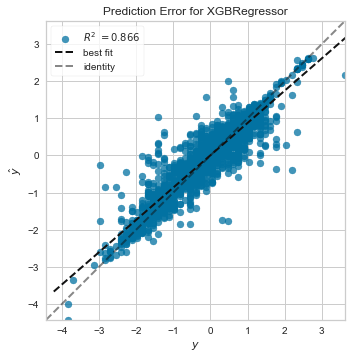

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                       callbacks=None, colsample_bylevel=1,
                                       colsample_bynode=1, colsample_bytree=1,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=0, gpu_id=-1,
                                       grow_policy='depthwise',
                                       importance_type=None,
                                       interaction_constraints='',
                                       learning_rate=0.300000012, max_bin=256,
                                       max_cat_threshold=64,
                                       max_cat_to_

In [160]:
import math
print('Root Mean squared error (RMSE): %.2f'
      % math.sqrt(mean_squared_error(y_test, y_test_pred) ) )
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_test_pred))
# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(xgb_r, X_train, y_train, X_test, y_test))


# Model 5- SVM 

In [169]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

In [173]:
model5 = MultiOutputRegressor(SVR())
model5.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR())

In [174]:
y_test_pred = model5.predict(X_test)

In [175]:
import math
print('Root Mean squared error (RMSE): %.2f'
      % math.sqrt(mean_squared_error(y_test, y_test_pred) ) )
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_test_pred))

Root Mean squared error (RMSE): 0.55
Coefficient of determination (R^2): 0.69
